In [122]:
%matplotlib inline

import logging
from pathlib import Path

if Path.cwd().stem == "notebooks":
    %cd ..
from src.log_config import configure_logging

configure_logging(
    stream_level=logging.DEBUG,
    ignore_libs=["numexpr", "numba", "bokeh", "matplotlib", "tornado", "Comm"],
)

In [123]:
import holoviews as hv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import polars as pl

from src.experiments.measurement.stimulus_generator import (
    StimulusGenerator,
)
from src.experiments.thermoino import ThermoinoComplexTimeCourses

from src.helpers import to_describe
from src.visualization.plot_stimulus import plot_stimulus_with_shapes

pl.Config.set_tbl_rows(12)  # for the 12 trials
hv.extension("plotly")
plt.rcParams["figure.figsize"] = [15, 5]  # default is [6, 4]

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [124]:
dummy_config = {
    "seeds": [1, 2, 3],
    "half_cycle_num": 2,
    "period_range": [2, 2],
    "major_decreasing_half_cycle_num": 0,
    "shorten_expected_duration": 0,
    "amplitude_range": [0.9, 1.0],
    "plateau_num": 0,
    "prolonged_minima_num": 0,
}

dummy_participant = {
    "temperature_baseline": 47.0,
    "temperature_range": 1.5,  # VAS 0 - VAS 70
}


config = {
    "seeds": [133, 243, 265, 396, 467, 658, 681, 743, 806, 841, 870, 952],
    "sample_rate": 10,
    "half_cycle_num": 10,
    "period_range": [5, 20],
    "amplitude_range": [0.3, 1.0],
    "inflection_point_range": [-0.4, 0.3],
    "shorten_expected_duration": 2,
    "major_decreasing_half_cycle_num": 3,
    "major_decreasing_half_cycle_period": 20,
    "major_decreasing_half_cycle_amplitude": 0.925,
    "major_decreasing_half_cycle_min_y_intercept": 0.9,
    "plateau_num": 2,
    "plateau_duration": 15,
    "plateau_percentile_range": [25, 50],
    "prolonged_minima_num": 1,
    "prolonged_minima_duration": 5,
}
assert len(config["seeds"]) == len(set(config["seeds"])), "Seeds must be unique"
assert len(config["seeds"]) == 12, "There must be 12 seeds"

# Plot one random seed
config.update(dummy_participant)
seed = np.random.randint(0, 1000)
stimulus = StimulusGenerator(config, debug=0, seed=396)

# print("Plot one random seed:")
plot_stimulus_with_shapes(stimulus)

In [125]:
def inverse_ctc(thermoino, stimulus):
    # Use thermoino for complex temperature courses:
    bin_size_ms = thermoino.bin_size_ms
    mms_rate_of_rise_ms = thermoino.mms_rate_of_rise / 1e3
    # Scale the CTC back to the temperature changes
    temp_course_resampled_diff = ctc * mms_rate_of_rise_ms
    # Reconstruct the resampled temperature course
    temp_course_resampled = np.cumsum(temp_course_resampled_diff) + stimulus.y[0]
    print(temp_course_resampled.shape)
    # Interpolating manually with a stepwise 'ffill'
    original_length = int(stimulus.duration)
    bin_size_samples = int((bin_size_ms / 1000) * sample_rate)  # Convert ms to samples
    expanded_steps = np.repeat(temp_course_resampled, bin_size_samples)[
        : original_length * sample_rate
    ]

    plt.plot(expanded_steps)
    plt.plot(stimulus.y)
    plt.grid()
    # scale x ticks to seconds
    plt.xticks(
        np.arange(0, len(expanded_steps), sample_rate),
        np.arange(0, len(expanded_steps) / sample_rate),
    )
    return expanded_steps

In [126]:
from dataclasses import dataclass


@dataclass
class DummyStimulusGenerator:
    duration: int
    sample_rate: int

    def __post_init__(self):
        self.y = (
            -np.cos(np.linspace(0, 2 * np.pi, self.duration * self.sample_rate)) * 4
            + 40
        )

15:50:32 | DEBUG   | thermoino | Running in dummy mode.
15:50:32 | DEBUG   | thermoino | Complex temperature course (CTC) initialized.
15:50:32 | DEBUG   | thermoino | Complex temperature course (CTC) created with 150 bins of 200 ms.
(150,)


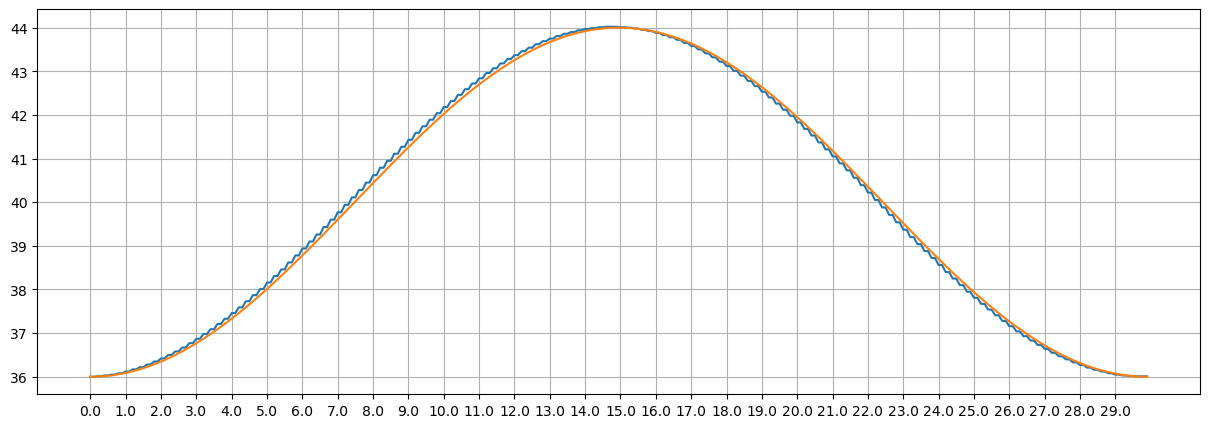

In [145]:
bin_size_ms = 200
sample_rate = 10
duration = 30
mms_baseline = 28
mms_rate_of_rise = 10

stimulus = DummyStimulusGenerator(
    sample_rate=sample_rate,
    duration=duration,
)

thermoino = ThermoinoComplexTimeCourses(
    mms_baseline=mms_baseline,
    mms_rate_of_rise=mms_rate_of_rise,
    dummy=True,
)
thermoino.connect()
thermoino.init_ctc(bin_size_ms=bin_size_ms)
thermoino.create_ctc(temp_course=stimulus.y, sample_rate=stimulus.sample_rate)
ctc = thermoino.ctc

inverse_ctc(thermoino, stimulus);

15:48:36 | DEBUG   | thermoino | Running in dummy mode.
15:48:36 | DEBUG   | thermoino | Complex temperature course (CTC) initialized.
15:48:36 | DEBUG   | thermoino | Complex temperature course (CTC) created with 360 bins of 500 ms.
(360,)


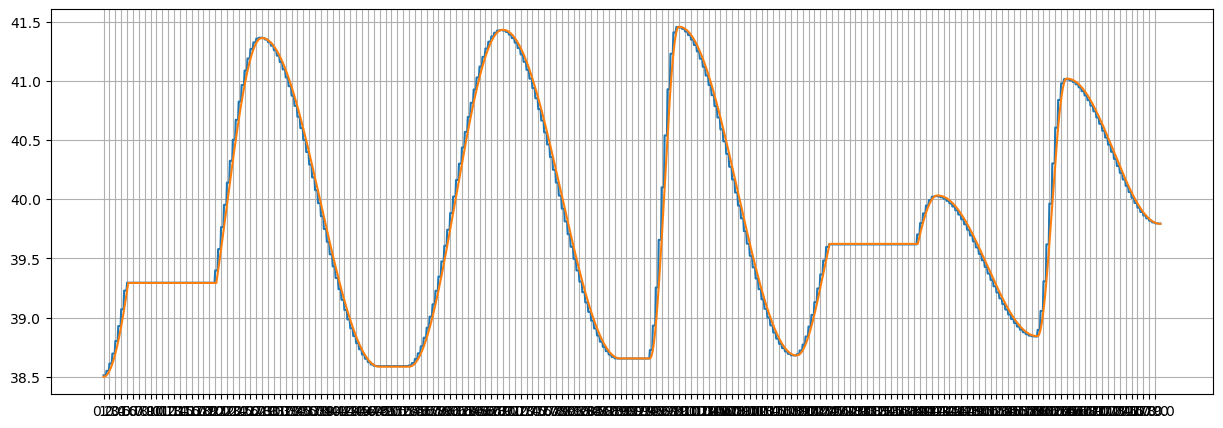

In [130]:
bin_size_ms = 500
sample_rate = 10
duration = 30
mms_baseline = 28
mms_rate_of_rise = 2

stimulus = StimulusGenerator()

thermoino = ThermoinoComplexTimeCourses(
    mms_baseline=mms_baseline,
    mms_rate_of_rise=mms_rate_of_rise,
    dummy=True,
)
thermoino.connect()
thermoino.init_ctc(bin_size_ms=bin_size_ms)
thermoino.create_ctc(temp_course=stimulus.y, sample_rate=stimulus.sample_rate)
ctc = thermoino.ctc

inverse_ctc(thermoino, stimulus);

In [129]:
import time
from src.experiments.thermoino import ThermoinoComplexTimeCourses, list_com_ports
import pandas as pd
import numpy as np


dummy_participant = {
    "temperature_baseline": 48.0,
    "temperature_range": 2,  # VAS 0 - VAS 70
}

config.update(dummy_participant)
config["sample_rate"] = 100
stimulus = StimulusGenerator(config, 133)
sample_rate = 10
seconds = 30
length = seconds * sample_rate
stimulus = stim(
    y=-np.cos(np.linspace(0, 2 * np.pi, length)) * 4 + 40,
    sample_rate=sample_rate,
)

sample_rate = stimulus.sample_rate
bin_size_ms = 500
mms_rate_of_rise = 10
temp_course_start = stimulus.y[0]
# List all available serial ports
list_com_ports()
port = "COM5"

# Set up thermoino
thermoino = ThermoinoComplexTimeCourses(
    mms_baseline=28,  # has to be the same as in MMS
    mms_rate_of_rise=mms_rate_of_rise,  # has to be the same as in MMS
    dummy=True,
)
temp_course_original = inverse_ctc()

TypeError: stim.__init__() got an unexpected keyword argument 'y'

In [ ]:
np.allclose(temp_course_original, stimulus.y, atol=0.5)

True

In [ ]:
temp_course_original[0 : -1 - int(bin_size_ms / stimulus.sample_rate)].shape

(1754,)

In [ ]:
bin_size_ms

500

In [ ]:
# thermoino.load_ctc()
# thermoino.trigger()
# time_to_ramp_up = thermoino.prep_ctc()
# thermoino.sleep(duration=time_to_ramp_up)
# time_to_exec_ctc = thermoino.exec_ctc()
# thermoino.sleep(time_to_exec_ctc)
# # Account for some delay at the end of the complex time course
# time.sleep(1)
# time_to_ramp_down, _ = thermoino.set_temp(32)
# thermoino.flush_ctc()
# thermoino.close()

50 +ber 5 s
49 über 10 s